In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.enable_eager_execution()
print("Tensorflow: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

Tensorflow: 1.9.0
Eager execution: True


Now we'll load the dataset and inspect it a little - I have two approaches in mind, both of which involve scaling pixel intensities down to [0, 1]:
1) Threshold pixel classes at 0.5 - <0.5 is white, >0.5 is black
2) Treat the pixel intensities as the likelihood of activation

Training samples:  60000
Test cases:  10000
Training shape:  (28, 28)


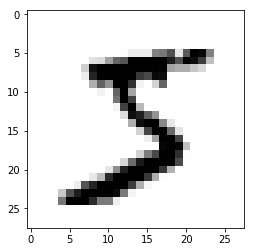

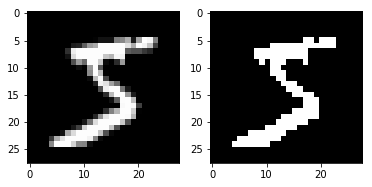

In [34]:
train, test = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Quick check on the sizes of the datasets
print("Training samples: ", len(train[0]))
print("Test cases: ", len(test[0]))

# Checking the size of each sample
print("Training shape: ", train[0][0].shape)

# print(train[0][0]) -- examining the values; 0-255

# Checking out a sample
image = train[0][0]
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

# Messing with the same sample
example = train[0][0]
example = example / 255.0

for i, x in enumerate(example):
    for j, y in enumerate(x):
        if y < 0.5:
            example[i][j] = 0
        else:
            example[i][j] = 1

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(image)
axarr[1].imshow(example)

The first situation I'll try is forcing the pixels to 1 or 0, and then training an RBM on that data.